<a href="https://colab.research.google.com/github/GislaineGomes/deco_morse/blob/main/Analise_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Mastercard_stock_history.csv')
df2 = pd.read_csv('/content/Mastercard_stock_info.csv')
df.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [35]:
df2.head()


,zip,10577
0,sector,Financial Services
1,fullTimeEmployees,21000
2,longBusinessSummary,"Mastercard Incorporated, a technology company,..."
3,city,Purchase
4,phone,914 249 2000


In [36]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df2)

https://docs.google.com/spreadsheets/d/1-_HGZS9UFl6bMt4OUo-dMsSUXMC_muQydgc0m5vm5FE#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


Entendendo as metricas e dimensões desse google Sheets


In [25]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
from scipy import stats

**Quantidade de linhas que eu tenho no meu Data set

In [57]:
# prompt: Quantidade de linhas que eu tenho no meu Data set

print(f"Number of rows in df: {len(df)}")
print(f"Number of rows in df2: {len(df2)}")

O dataset tem 3872 linhas.


**Preparação dos Dados** - Removendo valores Nulos


In [7]:
df.isnull().sum()
df = df.dropna()
df = df.dropna()

**Conhecendo o arquivo**


In [37]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High          3872 non-null   float64
 2   Low           3872 non-null   float64
 3   Close         3872 non-null   float64
 4   Volume        3872 non-null   int64  
 5   Dividends     3872 non-null   float64
 6   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 242.0 KB


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     150 non-null    object
 1   10577   117 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


***Entendendo o Minimo, Maximo e Mediana***

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [39]:
df2.describe()

,zip,10577
count,150,117
unique,150,105
top,sector,1
freq,1,2


***Começando analisar os dados***

In [12]:
df[cat_cols].nunique()

,0
Date,3872


In [40]:
df2[cat_cols].nunique()

,0


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Dividends'}>],
       [<Axes: title={'center': 'Stock Splits'}>, <Axes: >, <Axes: >]],
      dtype=object)

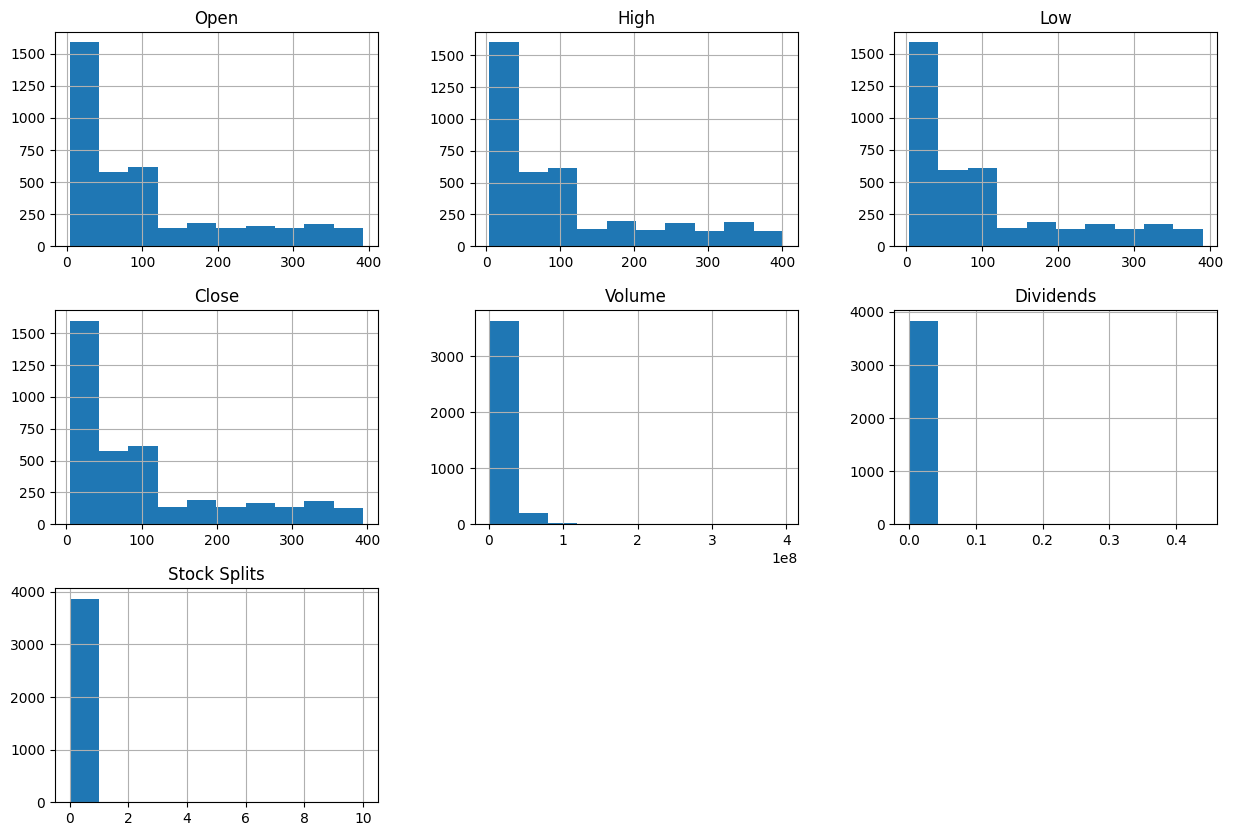

In [20]:
df.hist(figsize=(15, 10))

Os graficos, mostra o volume de ações da Mastercard negociadas diariamente. Há um aumento significativo no volume no início de 2009. Caso contrário, o volume geralmente diminuiu ao longo do tempo.

**Como as ações da mastercard se comporta ao longo do tempo. Com o retorno financeiro. **

**Criando um modelo , neste campo vamos entender o dataset do modelo. **

In [29]:
train = pd.read_csv("/content/Mastercard_stock_history.csv")
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())


Quantidade de elementos de treino: 3872
         Date      Open      High       Low     Close     Volume  Dividends  \
0  2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
1  2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2  2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
3  2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
4  2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [44]:
train = pd.read_csv("/content/Mastercard_stock_info.csv")
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())


Quantidade de elementos de treino: 150
                   zip                                              10577
0               sector                                 Financial Services
1    fullTimeEmployees                                              21000
2  longBusinessSummary  Mastercard Incorporated, a technology company,...
3                 city                                           Purchase
4                phone                                       914 249 2000


In [65]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


**Criando o modelo

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x = df['Volume']
y = df.drop('Volume', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 Date
2006-05-25    395343000
2006-05-26    103044000
2006-05-30     49898000
2006-05-31     30002000
2006-06-01     62344000
                ...    
2007-12-19     44661000
2007-12-20     41105000
2007-12-21     50920000
2007-12-24     10526000
2007-12-26     12477000
Name: Volume, Length: 400, dtype: int64
X_teste:
 Date
2007-12-27    20166000
2007-12-28     9901000
2007-12-31    13115000
2008-01-02    20156000
2008-01-03    28994000
                ...   
2021-10-05     4724100
2021-10-06     3712000
2021-10-07     3209200
2021-10-08     2336700
2021-10-11     2766800
Name: Volume, Length: 3472, dtype: int64
y_treino:
                  Open       High        Low      Close  Dividends  \
Date                                                                
2006-05-25   3.748967   4.283869   3.739664   4.279217        0.0   
2006-05-26   4.307126   4.348058   4.103398   4.179680        0.0   
2006-05-30   4.183400   4.184330   3.986184   4.093164        0.0   
2006-05-31   4.

In [69]:
x = df['High']
y = df.drop('High', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 Date
2006-05-25     4.283869
2006-05-26     4.348058
2006-05-30     4.184330
2006-05-31     4.219679
2006-06-01     4.474572
                ...    
2007-12-19    19.921988
2007-12-20    20.296110
2007-12-21    19.861197
2007-12-24    20.010851
2007-12-26    19.711550
Name: High, Length: 400, dtype: float64
X_teste:
 Date
2007-12-27     20.198839
2007-12-28     19.965950
2007-12-31     20.334461
2008-01-02     20.603826
2008-01-03     20.113733
                 ...    
2021-10-05    348.130138
2021-10-06    348.439763
2021-10-07    357.899994
2021-10-08    360.369995
2021-10-11    354.880005
Name: High, Length: 3472, dtype: float64
y_treino:
                  Open        Low      Close     Volume  Dividends  \
Date                                                                
2006-05-25   3.748967   3.739664   4.279217  395343000        0.0   
2006-05-26   4.307126   4.103398   4.179680  103044000        0.0   
2006-05-30   4.183400   3.986184   4.093164   49898000        

In [70]:
x = df['Close']
y = df.drop('Close', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 Date
2006-05-25     4.279217
2006-05-26     4.179680
2006-05-30     4.093164
2006-05-31     4.180608
2006-06-01     4.419686
                ...    
2007-12-19    19.860258
2007-12-20    19.337421
2007-12-21    19.861197
2007-12-24    19.839689
2007-12-26    19.592766
Name: Close, Length: 400, dtype: float64
X_teste:
 Date
2007-12-27     19.644203
2007-12-28     19.641399
2007-12-31     20.127760
2008-01-02     20.079121
2008-01-03     19.839689
                 ...    
2021-10-05    342.776886
2021-10-06    348.250000
2021-10-07    353.910004
2021-10-08    354.959991
2021-10-11    347.149994
Name: Close, Length: 3472, dtype: float64
y_treino:
                  Open       High        Low     Volume  Dividends  \
Date                                                                
2006-05-25   3.748967   4.283869   3.739664  395343000        0.0   
2006-05-26   4.307126   4.348058   4.103398  103044000        0.0   
2006-05-30   4.183400   4.184330   3.986184   49898000      

Quantidade de vezes que vamos testar o modelo

In [82]:
X_teste.shape

(3472,)

In [81]:
X_treino.shape

(400,)

In [77]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout



In [79]:
model=Sequential()
model.add(LSTM(units=3250,return_sequences=True,input_shape=(X_treino.shape[0],1)))
print (model.output_shape)

(None, 400, 3250)


In [110]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(400,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,649 (233.00 KB)

 Trainable params: 59,649 (233.00 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
print(X_treino.shape)
print(X_teste.shape)

(400,)
(3472,)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 267696654516224.0000 - mae: 5214247.0000 - val_loss: 47122682478592.0000 - val_mae: 1682808.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 382807448748032.0000 - mae: 5412794.0000 - val_loss: 47122636341248.0000 - val_mae: 1682793.5000
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 353871280996352.0000 - mae: 5225815.0000 - val_loss: 47122539872256.0000 - val_mae: 1682800.3750
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 260279380213760.0000 - mae: 4932610.5000 - val_loss: 47122397265920.0000 - val_mae: 1682847.5000
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 408992153075712.0000 - mae: 5385400.5000 - val_loss: 47122233688064.0000 - val_mae: 1682913.7500
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 309651539230720.0000 - mae: 5120736.5000 - val_loss: 47122007195648.0000 - val_mae: 1683002.5000
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 40541

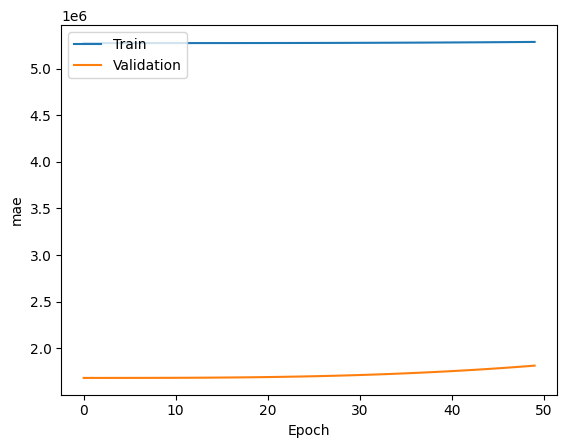

In [109]:
import matplotlib.pyplot as plt

history = model.fit(X_treino, y_treino, epochs=50, batch_size=32, validation_data=(X_teste, y_teste), verbose=1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Quantidade de vezes que o modelo esta sendo aplicado e com pequenas variaçoes nas açoes

In [117]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [120]:
X = np.random.randn(100, 400)
y = np.random.randn(100)

In [118]:
model = Sequential()
model.add(Dense(64, input_dim=400, activation='relu'))
model.add(Dense(1))

In [121]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
100/100 - 1s - 7ms/step - loss: 2.2405
Epoch 2/10
100/100 - 0s - 1ms/step - loss: 1.8714
Epoch 3/10
100/100 - 0s - 1ms/step - loss: 0.7124
Epoch 4/10
100/100 - 0s - 1ms/step - loss: 0.4079
Epoch 5/10
100/100 - 0s - 1ms/step - loss: 0.3634
Epoch 6/10
100/100 - 0s - 1ms/step - loss: 0.4127
Epoch 7/10
100/100 - 0s - 2ms/step - loss: 0.4780
Epoch 8/10
100/100 - 0s - 1ms/step - loss: 0.5131
Epoch 9/10
100/100 - 0s - 1ms/step - loss: 0.4378
Epoch 10/10
100/100 - 0s - 1ms/step - loss: 0.3311
